In [1]:
import os, mglearn
import pandas as pd

In [2]:
name1 = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','gender',
         'capital-gain','capital-loss','hours-per-week','native-country','income']
data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "adult.data"),
                  header=None, index_col=False, names=name1)
data = data[['age','workclass','education','gender','hours-per-week','occupation','income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [3]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [4]:
data.columns

Index(['age', 'workclass', 'education', 'gender', 'hours-per-week',
       'occupation', 'income'],
      dtype='object')

In [5]:
data_dummies = pd.get_dummies(data)
data_dummies.columns

Index(['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'gender_ Female', 'gender_ Male',
       'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
   

In [6]:
features =data_dummies.loc[:, 'age':'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values

In [7]:
X.shape

(32561, 44)

In [8]:
y.shape

(32561,)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(lr.score(X_test, y_test)))

테스트 점수: 0.81


In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([("scaling",StandardScaler(),['age','hours-per-week']),\
                        ("onehot",OneHotEncoder(sparse=False),
                         ['workclass','education','gender','occupation'])])

In [13]:
ct

ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                 ['age', 'hours-per-week']),
                                ('onehot', OneHotEncoder(sparse=False),
                                 ['workclass', 'education', 'gender',
                                  'occupation'])])

In [15]:
data_features = data.drop("income", axis = 1)
data_features[:3]

,age,workclass,education,gender,hours-per-week,occupation
0,39,State-gov,Bachelors,Male,40,Adm-clerical
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial
2,38,Private,HS-grad,Male,40,Handlers-cleaners


In [16]:
data[:3]

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K


In [18]:
X_train,X_test,y_train,y_test = train_test_split(data_features, data.income, random_state=0)

In [19]:
X_train.shape

(24420, 6)

In [22]:
y_train

26464     <=50K
16134     <=50K
4747       >50K
8369      <=50K
5741      <=50K
          ...  
13123      >50K
19648     <=50K
9845      <=50K
10799      >50K
2732      <=50K
Name: income, Length: 24420, dtype: object

In [26]:
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_train_trans.shape

(24420, 44)

In [27]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_trans, y_train)

LogisticRegression(max_iter=1000)

In [28]:
X_test_trans = ct.transform(X_test)

In [29]:
lr.score(X_test_trans, y_test)

0.808991524382754

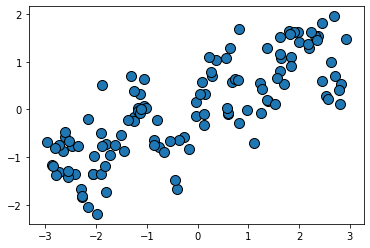

In [43]:
mglearn.discrete_scatter(X,y)

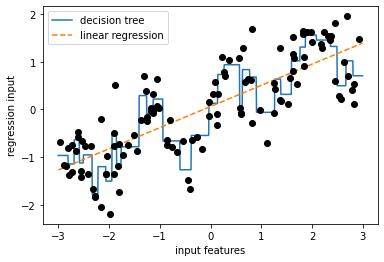

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X,y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)
plt.plot(line,reg.predict(line),label='decision tree')

reg = LinearRegression().fit(X,y)
plt.plot(line,reg.predict(line),'--',label="linear regression")
plt.plot(X[:,0],y,'o',c='k')
plt.ylabel("regression input")
plt.xlabel("input features")
plt.legend(loc="best")
plt.show()

In [51]:
from sklearn.preprocessing import KBinsDiscretizer

In [53]:
kb = KBinsDiscretizer(n_bins=10,strategy='uniform')
kb.fit(X)
kb.bin_edges_

array([array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])], dtype=object)

In [54]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [55]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [56]:
kb = KBinsDiscretizer(n_bins=10,strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

Text(0.5, 0, 'input features')

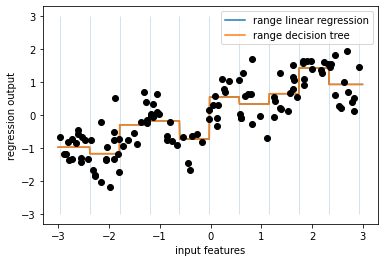

In [57]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned,y)
plt.plot(line, reg.predict(line_binned),label='range linear regression')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line, reg.predict(line_binned),label='range decision tree')
plt.plot(X[:,0],y,'o',c='k')
plt.vlines(kb.bin_edges_[0],-3,3,linewidth=1,alpha=.2)
plt.legend(loc='best')
plt.ylabel('regression output')f
plt.xlabel('input features')